# K-means algorithm

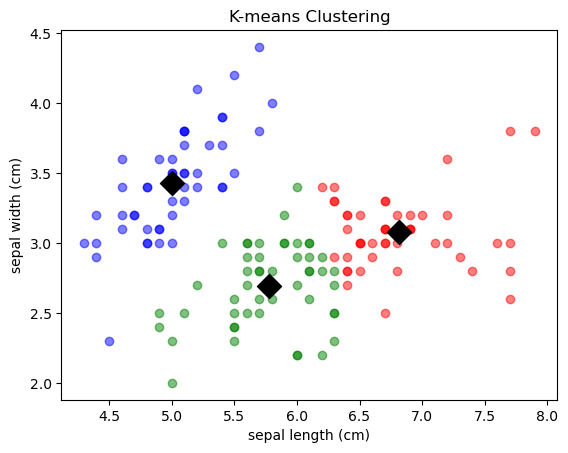

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy

# 載入 iris 數據集，這是一個常見的分類數據集
iris = datasets.load_iris()

samples = iris.data  # 取得特徵數據
x = samples[:, 0]   # 取第一個特徵：sepal length (萼片長度)
y = samples[:, 1]   # 取第二個特徵：sepal width (萼片寬度)

# 合併兩個特徵，形成一個二維數據集
sepal_length_width = np.array(list(zip(x, y)))

# 設定聚類的數量 k = 3 (因為 iris 數據集有三個品種)
k = 3

# 隨機初始化 k 個質心 (centroids) 在特徵的範圍內
centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

# 合併兩個質心座標，形成質心矩陣
centroids = np.array(list(zip(centroids_x, centroids_y)))

# 計算兩個點間的歐幾里得距離的函數
def distance(a, b):
    return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

# 分配每個樣本到最近的質心
def assign_to_centroid(sample, centroids):
    distances = np.zeros(len(centroids))  # 用來儲存每個質心到樣本的距離
    for i, centroid in enumerate(centroids):
        distances[i] = distance(sample, centroid)  # 計算距離
    closest_centroid = np.argmin(distances)  # 返回最小距離的質心索引
    return closest_centroid

# 用來儲存更新前的質心
centroids_old = np.zeros(centroids.shape)

# 標籤用來表示每個樣本所屬的群集 (0, 1, 2)
labels = np.zeros(len(samples))

# 初始化誤差值 (distance between old and new centroids)
error = np.zeros(k)

# 初始誤差計算
for i in range(k):
    error[i] = distance(centroids[i], centroids_old[i])

# 迭代直到質心不再變動 (收斂)
while error.any() != 0:  # 檢查是否所有誤差都為零，即質心不再變動
    # Step 2: 將每個樣本分配到最近的質心
    for i in range(len(samples)):
        labels[i] = assign_to_centroid(samples[i], centroids)

    # Step 3: 更新質心
    centroids_old = deepcopy(centroids)  # 保存當前質心

    # 更新每個質心的位置
    for i in range(k):
        # 找到所有屬於當前群集的樣本
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        centroids[i] = np.mean(points, axis=0)  # 計算新質心（所有點的均值）
        error[i] = distance(centroids[i], centroids_old[i])  # 計算新舊質心之間的誤差

# 使用不同顏色繪製每個群集的數據點
colors = ['r', 'g', 'b']
for i in range(k):
    points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

# 標記每個群集的質心
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150, c='black')  # 黑色的菱形標記質心

# 標籤與標題設置
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('K-means Clustering')

# 顯示圖形
plt.show()

# KMeans using sklearn

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Inertia: 78.85144142614601


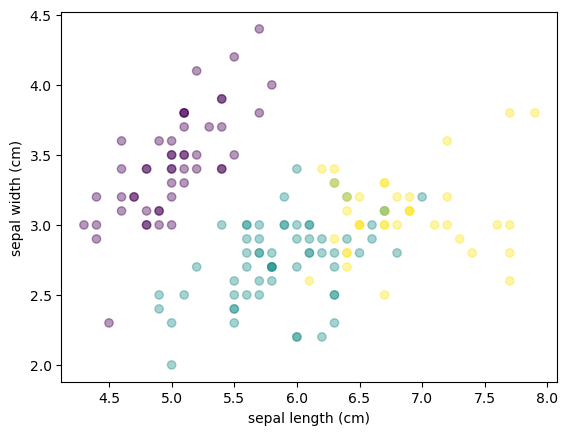

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# 載入 iris 數據集，這是一個常見的分類數據集
iris = datasets.load_iris()

# 取得樣本特徵數據
samples = iris.data

# 創建一個 KMeans 聚類模型，設定聚類數量為 3 (因為 iris 數據集有三個品種)
model = KMeans(n_clusters=3,  n_init=10)

# 對樣本進行聚類
model.fit(samples)

# 預測每個樣本的聚類標籤
labels = model.predict(samples)

# 打印每個樣本的聚類標籤
print(labels)

# 打印模型的 inertia_，表示聚類結果的總誤差
# inertia_ 是每個點與其所屬質心的平方距離總和，數值越小代表聚類效果越好
print("Inertia:", model.inertia_)

# 取出前兩個特徵：萼片長度 (sepal length) 和萼片寬度 (sepal width)
x = samples[:, 0]
y = samples[:, 1]

# 使用 matplotlib 繪製散點圖，根據聚類標籤 (labels) 設置不同顏色
# alpha=0.4 用來設置透明度，使點的重疊部分不會太擁擠
plt.scatter(x, y, c=labels, alpha=0.4)

# 設置 X 軸和 Y 軸的標籤
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

# 顯示圖形
plt.show()

         labels    species
0        setosa     setosa
1        setosa     setosa
2        setosa     setosa
3        setosa     setosa
4        setosa     setosa
..          ...        ...
145   virginica  virginica
146  versicolor  virginica
147   virginica  virginica
148   virginica  virginica
149  versicolor  virginica

[150 rows x 2 columns]
species     setosa  versicolor  virginica
labels                                   
setosa          50           0          0
versicolor       0          48         14
virginica        0           2         36


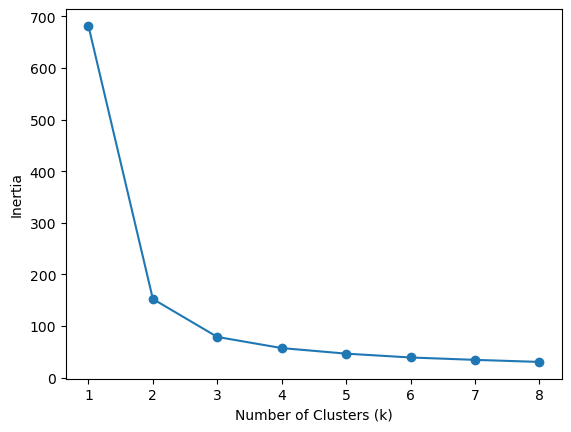

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd

# 載入 iris 數據集，這是用於聚類和分類的經典數據集
iris = datasets.load_iris()

# 獲取 iris 數據集的特徵數據 (樣本)，包含 150 個樣本，每個樣本有 4 個特徵
samples = iris.data

# 獲取 iris 數據集的目標標籤 (即每個樣本的真實品種)，每個樣本對應 0, 1 或 2 代表 3 種不同的品種
target = iris.target

# 創建 KMeans 模型，設定要分成 3 顆聚類 (對應到 3 種品種)
model = KMeans(n_clusters=3, n_init=10)

# 擬合 KMeans 模型，並進行聚類
model.fit(samples)

# 使用 KMeans 模型的預測結果將每個樣本分配到一個聚類，並將其映射為品種名稱
labels = [iris.target_names[s] for s in model.predict(samples)]

# 使用真實標籤 (target) 對應的品種名稱
species = [iris.target_names[t] for t in list(target)]

# 創建 DataFrame，其中包含 KMeans 模型預測的標籤 ('labels') 和真實的品種名稱 ('species')
df = pd.DataFrame({'labels': labels, 'species': species})

# 顯示 DataFrame 內容，這將顯示每個樣本的預測品種與真實品種的對比
print(df)

# 創建交叉表來比較模型預測的標籤與真實標籤之間的匹配情況
# 交叉表的行為 KMeans 聚類標籤，列為真實標籤
ct = pd.crosstab(df['labels'], df['species'])

# 顯示交叉表結果，可以幫助檢查預測和真實標籤的匹配情況
print(ct)

# ---------------------------------------
# 選擇最佳聚類數 (k)：使用肘部法則 (Elbow Method)
# 計算不同聚類數量 (k) 下的慣性 (Inertia)，慣性越小代表聚類越精確
num_clusters = list(range(1, 9))  # 嘗試的聚類數範圍是從 1 到 8
inertias = []

# 計算每個聚類數量下的慣性
for k in num_clusters:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(samples)  # 擬合模型
    inertias.append(model.inertia_)  # 記錄慣性

# 畫出聚類數 (k) 與慣性之間的關係圖，幫助選擇最佳聚類數
plt.plot(num_clusters, inertias, '-o')

# 設置圖形的標籤
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# 顯示圖形
plt.show()

In [4]:
import datetime

current_date = datetime.datetime.now().strftime("%Y年%m月%d日")
print(f"更新日期: {current_date}")

更新日期: 2024年12月01日
